# EE 769 Assignment 2


Manuraj P M  -  213230012



DATA READING,PREPROCESSING AND IMPUTATION

In [1]:
import pandas as pd  #Related library
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
sns.set(style="darkgrid")
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore") #Ignore warnings
plt.rcParams['figure.figsize'] =(30,15) #Set size of plot
train_df = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv")
train_df.info()
train_df.Genotype.value_counts() #Value count...
train_df.Treatment_Behavior.value_counts()
#Unique values count
for clms in train_df.columns.values: #Ittertared through columns
  print(clms+" has "+str(len(pd.unique(train_df[clms])))+" unique values ") #Generates string length for unique values in each columns
  print("\n")
from sklearn.experimental import enable_iterative_imputer #Related library
from sklearn.impute import IterativeImputer
data_test_ip = train_df.loc[:,'DYRK1A_N':'CaNA_N'] #taking the features out of the dataset
data_test_ip 
#ref [5]

# imp = IterativeImputer(max_iter=20, random_state=0)
# imp.fit(data_test_ip)
# IterativeImputer(random_state=0)
# imp.transform(data_test_ip)

#ref [9]
#now we will do the imputation since some values are nan
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state=42)
test_data_ip = imputer.fit_transform(data_test_ip)
test_data_ip = pd.DataFrame(test_data_ip, columns=data_test_ip.columns)
test_data_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DYRK1A_N            762 non-null    float64
 1   ITSN1_N             762 non-null    float64
 2   BDNF_N              762 non-null    float64
 3   NR1_N               762 non-null    float64
 4   NR2A_N              762 non-null    float64
 5   pAKT_N              762 non-null    float64
 6   pBRAF_N             762 non-null    float64
 7   pCAMKII_N           762 non-null    float64
 8   pCREB_N             762 non-null    float64
 9   pELK_N              762 non-null    float64
 10  pERK_N              762 non-null    float64
 11  pJNK_N              762 non-null    float64
 12  PKCA_N              762 non-null    float64
 13  pMEK_N              762 non-null    float64
 14  pNR1_N              762 non-null    float64
 15  pNR2A_N             762 non-null    float64
 16  pNR2B_N 

**Eliminationg Hoghly correlated columns**

In [2]:
corrM = test_data_ip.corr()#To Generate correlation matrix df
corrM.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
DYRK1A_N,1.000000,0.961321,0.407110,0.314795,0.340011,-0.182126,-0.085401,-0.158167,0.082463,0.811398,...,-0.223812,-0.255974,-0.216103,-0.358480,-0.251624,-0.035929,-0.335634,-0.318127,-0.303629,0.457907
ITSN1_N,0.961321,1.000000,0.495102,0.428745,0.421034,-0.149509,-0.068712,-0.114789,0.200468,0.796880,...,-0.220720,-0.341409,-0.307867,-0.299066,-0.323878,0.039384,-0.357801,-0.404352,-0.374469,0.495085
BDNF_N,0.407110,0.495102,1.000000,0.817986,0.746004,0.241501,0.332689,0.129602,0.569146,0.458951,...,-0.112984,-0.241762,-0.170503,0.070504,-0.261622,0.454025,-0.284638,-0.245891,-0.316513,0.304098
NR1_N,0.314795,0.428745,0.817986,1.000000,0.866667,0.185322,0.220929,0.253744,0.599846,0.399791,...,-0.100915,-0.431328,-0.329547,0.227674,-0.354048,0.486483,-0.339320,-0.371601,-0.416312,0.205033
NR2A_N,0.340011,0.421034,0.746004,0.866667,1.000000,0.076446,0.079740,0.223203,0.362348,0.387644,...,-0.237932,-0.515386,-0.360714,0.215495,-0.398397,0.377628,-0.365133,-0.404731,-0.495630,0.185840


Here correlation greater than 0.9 used as the threshold level

In [3]:
#run through the matrix, checking each value to compare it with 0.9 and then taking note of those values and their index

corrM_array = np.array(corrM)  #Correlation matrix in to numpy arrays
highCorr = []                  #To store the highly corelated columns
for i in range(0,len(corrM_array)): #Find those position that highly corelated
  for j in range(i,len(corrM_array[0])):
    if(i!=j):
      if (corrM_array[i][j] >=0.9):  #Those positions in correlation matrix has values greater than or equal to 0.9
        tup = (i,j)
        highCorr.append(tup) #save those index as tuple in highCorr list

highCorr #Result


[(0, 1),
 (0, 10),
 (0, 20),
 (1, 10),
 (1, 20),
 (3, 14),
 (3, 31),
 (10, 20),
 (14, 16),
 (53, 70)]

In [4]:
highCorr
highCorr_flat=list(sum(highCorr, ())) #flatten the list [7]https://stackoverflow.com/questions/40399315/flatten-tuple-containing-numpy-array-to-numpy-array
highCorr_flat=np.array(highCorr_flat) #converting into array
np.unique(highCorr_flat) #finding how many unique columns are correleted to some other columns.


array([ 0,  1,  3, 10, 14, 16, 20, 31, 53, 70])

In [5]:
# To find the unique columns

#in highcorr matrix, we will scan throuugh all its value and save them in the list ofcolumns to be remove
templist=[]
for i in highCorr:
  if i[0] not in templist:    #if the value is already there, we will not append it again
    templist.append(i[0])
remove_cols = np.array(templist)
remove_cols


array([ 0,  1,  3, 10, 14, 53])

In [6]:
#following snippete is taken from [8]https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe
# useful_df = train_df.drop(train_df.columns[[0,  1,  3,  4,  5,  6, 10, 11, 13]], axis=1)  #deleting half of the columns  (manually telling which columns to delete)
useful_df = test_data_ip.drop(test_data_ip.columns[remove_cols], axis=1)  #removing the columns
useful_df

,BDNF_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pJNK_N,PKCA_N,pMEK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.430175,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.306382,0.402698,0.296927,...,0.188852,0.122652,0.107515,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.411770,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.299051,0.385987,0.281319,...,0.200404,0.116682,0.109055,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.418309,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.291276,0.381002,0.281710,...,0.193685,0.118508,0.108598,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.358626,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.296729,0.377087,0.313832,...,0.192112,0.132781,0.118362,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.358802,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.286961,0.363502,0.277964,...,0.205604,0.129954,0.118030,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.316564,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,0.317851,0.306417,0.282836,...,0.216128,0.156371,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465
758,0.321841,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,0.329786,0.323939,0.300555,...,0.209717,0.153224,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605
759,0.318545,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,0.354545,0.324182,0.310364,...,0.211279,0.166417,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514
760,0.297992,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,0.325819,0.310497,0.294646,...,0.197436,0.158631,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274


In [7]:
input_df1=useful_df

#https://stackoverflow.com/questions/40142686/converting-non-numeric-to-numeric-value-using-panda-libraries

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()  #lable encoder to encode the target values
enc.fit(train_df['Genotype'])   #specifying which column to be encoded
train_df['Genotype'] = enc.transform(train_df['Genotype'])    #overwriting with the lables 
model1_out = train_df["Genotype"]
model1_out

0      0
1      0
2      0
3      0
4      0
      ..
757    1
758    1
759    1
760    1
761    1
Name: Genotype, Length: 762, dtype: int64

Normalizing the data

In [8]:
from sklearn.preprocessing import StandardScaler
#Initalizing the Standard scaler
X_scaler = StandardScaler()
input_df1_scaled = X_scaler.fit_transform(input_df1)
#Standardizing ouput explicitly by substracting mean and dividing by standard deviation
output_df1_scaled = (model1_out-model1_out.mean())/model1_out.std()

**To split data into train and test**

In [9]:
from sklearn.model_selection import train_test_split #From sklearm.model we can choose train_test_split for this operation
model1_ip_train, model1_ip_test, model1_out_train, model1_out_test = train_test_split(input_df1_scaled, model1_out, test_size=0.2, random_state=42)#Test size is given as 0.2 then there may 20% test and 80% train datas.

In [10]:
from sklearn.model_selection import KFold
#model1_out , input_df1
fld= KFold(n_splits=5,random_state=30, shuffle=True)    #we will make 5 folds for kfold cross validation

In [11]:
 from sklearn.model_selection import GridSearchCV

# Binary Classification

**1.Logistic Regression with ElasticNet Penalty**

In [12]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)  #https://stackoverflow.com/questions/32612180/eliminating-warnings-from-scikit-learn

# param_grid={'alpha': [0.001,0.01, 0.1, 1,10],'l1_ratio': [0.001,0.01, 0.1, 1]}
param_grid={'C': [0.001,0.01, 0.1, 1,10,50,100] ,'l1_ratio': [0.001,0.01, 0.1, 1]}  #we prepare this grid containing range of hyper parameters, through this we will do hyperparameter tunning



# fld= KFold(n_splits=5,random_state=30, shuffle=True)
# mdl=ElasticNet(random_state=0)
mdl=LogisticRegression(random_state=0,penalty='elasticnet',solver='saga',max_iter=1000,tol=0.01)    
#now we perform grid search with this model to find best hyperparameters
gs= GridSearchCV(mdl, param_grid, cv=fld,scoring='f1') #since the classes are not balanced, it is wise to use f1 score

result=gs.fit(input_df1,model1_out)
result.best_params_ ,result
# result=cross_validate(mdl, input_df1, model1_out, cv=fld,return_estimator=True)


({'C': 10, 'l1_ratio': 1},
 GridSearchCV(cv=KFold(n_splits=5, random_state=30, shuffle=True),
              estimator=LogisticRegression(max_iter=1000, penalty='elasticnet',
                                           random_state=0, solver='saga',
                                           tol=0.01),
              param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 50, 100],
                          'l1_ratio': [0.001, 0.01, 0.1, 1]},
              scoring='f1'))

In [13]:
gs.best_estimator_ #best estimator (best hyperparameters (c and alpha))

LogisticRegression(C=10, l1_ratio=1, max_iter=1000, penalty='elasticnet',
                   random_state=0, solver='saga', tol=0.01)

In [14]:
print('Score Given by best estimator is :' + str(gs.best_score_))    #score given by best estimator

Score Given by best estimator is :0.8454754799299152


FINDING FEATURE IMPORTANCE

Text(0.5, 1.0, 'Feature Importance')

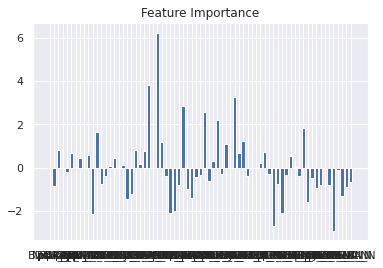

In [15]:
#https://stackoverflow.com/questions/48377296/get-feature-importance-from-gridsearchcv
# feat_imp=gs.best_estimator_.feature_importances_ # extracting importance of each feature for the grid serach result which is best estimator 
feat_imp=gs.best_estimator_.coef_[0]
fig = plt.figure()
plt.bar(gs.feature_names_in_,feat_imp)
plt.title('Feature Importance')

Recursive Feature Elimination


 Mean Test scores for each feature eliminated are:
[0.7494066  0.8005246  0.8373237  0.85181459 0.8504472  0.8504472
 0.86876505 0.86089611 0.85826453 0.85431717 0.86086171 0.90552976
 0.90814413 0.90292398 0.90289818 0.89764362 0.90159959 0.89896801
 0.89632783 0.89369625 0.89373925 0.89375645 0.89113347 0.88195734
 0.88589611 0.88458032 0.88588751 0.87932577 0.87932577 0.88324733
 0.88062436 0.88193154 0.88063295 0.87669419 0.88064155 0.88064155
 0.87800998 0.87932577 0.88062436 0.87930857 0.8753784  0.8753698
 0.8753612  0.8753612  0.87799278 0.87799278 0.87930857 0.87799278
 0.87930857 0.87667699 0.87272962 0.87009804 0.87009804 0.86879945
 0.87009804 0.87141383 0.87141383 0.87272962 0.87272962 0.87272962
 0.87272962 0.87404541 0.87404541 0.87404541 0.87404541 0.87404541
 0.87273822 0.87273822 0.87273822 0.87273822 0.87273822]

 Rankings of Each feature 
[53 21 16 59 43 26 50 36 55 28  4 12 14 27 48 34 51 46 19  2 20 45  9  1
 52  1 22 42  1  1 10  1  1  1 29 40  1 23 37  1 39 13 

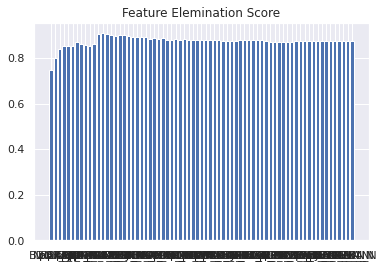

In [16]:
#reference: https://machinelearningmastery.com/rfe-feature-selection-in-python/
#reference:https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import RFECV
estimator = gs.best_estimator_    #we will use the best estimator achieved from gridsearch
selector = RFECV(estimator, step=1, cv=fld)   # define RFECV selector using best estimator
selector = selector.fit(input_df1,model1_out) # fit the data into selector

#print mean (of all folds) score for every feature eliminated
print("\n Mean Test scores for each feature eliminated are:")
print(selector.cv_results_['mean_test_score'])


#plot the scores after eliminating each feature

fig = plt.figure()
plt.bar(gs.feature_names_in_,selector.cv_results_['mean_test_score'])
plt.title('Feature Elemination Score')

#ranking of each feature as per score it gives when eliminated
print("\n Rankings of Each feature ")
print(selector.ranking_)


#maximum accuracy achieved in the process
print("\n maximum accuracy achieved is:")
print(max(selector.cv_results_['mean_test_score']))

Observations for LogReg:
1. The best score was achieved with hyperparameters c=10 and l1ratio of 1.
2. The score achieved was 0.84.
3. Through feature importance we got to know important features (graphically)
4. Removing certain feature increases the score significantly.

**2.Neural Network**

In [17]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)  #https://stackoverflow.com/questions/32612180/eliminating-warnings-from-scikit-learn

# param_grid={'alpha': [0.001,0.01, 0.1, 1,10],'l1_ratio': [0.001,0.01, 0.1, 1]}
# param_grid={'C': [0.001,0.01, 0.1, 1,10,50,100] ,'l1_ratio': [0.001,0.01, 0.1, 1]}
param_grid= {'alpha':[0.001,0.01,0.1,1,10,100] ,'hidden_layer_sizes': [(71)]}#,(80), (100), (120)] } # hyperparameters alpha(weight decay) and number of neurons in hidden layer



# fld= KFold(n_splits=5,random_state=30, shuffle=True)
# mdl=ElasticNet(random_state=0)
mdl= MLPClassifier(hidden_layer_sizes=(71),activation="relu" ,random_state=1, max_iter=1000)
gs= GridSearchCV(mdl, param_grid, cv=fld,scoring='f1') #since the classes are not balanced, it is wise to use f1 score

result=gs.fit(input_df1,model1_out)
result.best_params_ ,result
# result=cross_validate(mdl, input_df1, model1_out, cv=fld,return_estimator=True)


({'alpha': 0.1, 'hidden_layer_sizes': 71},
 GridSearchCV(cv=KFold(n_splits=5, random_state=30, shuffle=True),
              estimator=MLPClassifier(hidden_layer_sizes=71, max_iter=1000,
                                      random_state=1),
              param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                          'hidden_layer_sizes': [71]},
              scoring='f1'))

In [18]:
gs.best_estimator_ , gs.best_score_

(MLPClassifier(alpha=0.1, hidden_layer_sizes=71, max_iter=1000, random_state=1),
 0.828670912390763)

Finding Feature Importance

Text(0.5, 1.0, 'Feature Importance')

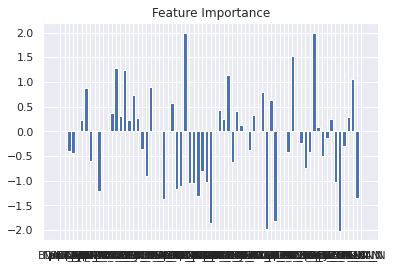

In [19]:
feat_imp=gs.best_estimator_.coefs_
feat_imp=feat_imp[1]
feat_imp=feat_imp.flatten()

fig = plt.figure()
plt.bar(gs.feature_names_in_,feat_imp)
plt.title('Feature Importance')

Observations for Neural Network:
1. The best score was achieved at weight decay= 0.1
2. Importance of certain features was observed.
3. Overall the score was not so good.

3.**SVM**

In [20]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm

param_grid= {'degree':[2,3,4,5,6] ,'gamma': [0.001,0.01,0.1,1,10]}
mdl = svm.SVC(kernel='linear') # Linear Kernel

gs= GridSearchCV(mdl, param_grid, cv=fld,scoring='f1') #since the classes are not balanced, it is wise to use f1 score

result=gs.fit(input_df1,model1_out)
result.best_params_ ,result




({'degree': 2, 'gamma': 0.001},
 GridSearchCV(cv=KFold(n_splits=5, random_state=30, shuffle=True),
              estimator=SVC(kernel='linear'),
              param_grid={'degree': [2, 3, 4, 5, 6],
                          'gamma': [0.001, 0.01, 0.1, 1, 10]},
              scoring='f1'))

In [21]:
gs.best_score_,gs.best_estimator_

(0.8910349900513836, SVC(degree=2, gamma=0.001, kernel='linear'))

Feature Importance

Text(0.5, 1.0, 'Feature Importance')

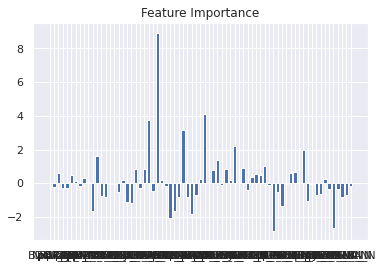

In [22]:
feat_imp=gs.best_estimator_.coef_
feat_imp
# feat_imp=gs.best_estimator_.coefs_
# feat_imp=feat_imp[1]
feat_imp=feat_imp.flatten()
fig = plt.figure()
plt.bar(gs.feature_names_in_,feat_imp)
plt.title('Feature Importance')

Recursive Feature Elimination


 Mean Test scores for each feature eliminated are:
[0.69288786 0.76503268 0.81097351 0.83464912 0.84912281 0.87272102
 0.8622119  0.86616787 0.86614207 0.87401101 0.86618507 0.87805298
 0.88326453 0.88061576 0.87930857 0.87668559 0.88587891 0.900301
 0.90292398 0.900301   0.90555556 0.90554696 0.90686275 0.90816993
 0.90686275 0.90555556 0.90685415 0.90686275 0.90554696 0.90552976
 0.90683695 0.90422257 0.90553836 0.90422257 0.90422257 0.90553836
 0.90948572 0.90816993 0.90816993 0.90948572 0.90685415 0.91343309
 0.9121173  0.91604747 0.9121087  0.9121087  0.91341589 0.91472308
 0.91472308 0.91603027 0.91734606 0.91734606 0.91603887 0.91603887
 0.91603887 0.91603027 0.91340729 0.91340729 0.91340729 0.91340729
 0.91472308 0.91472308 0.91340729 0.91472308 0.91472308 0.91472308
 0.91472308 0.91472308 0.91472308 0.91472308 0.91472308]

 Rankings of Each feature 
[18  4  1  1  1  1 12  9  1  7  1  1  1  1 17 15  1  8  1  1  1  1  1  1
  1  1  5  6  1  1  1  1  1  1  1  3  1 21  1  1 13  1 

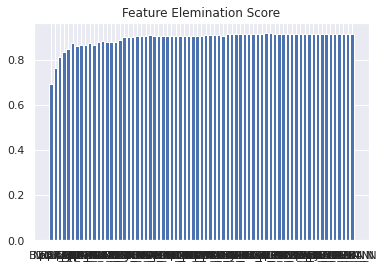

In [23]:
#reference: https://machinelearningmastery.com/rfe-feature-selection-in-python/
#reference:https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

val_model1= gs.best_estimator_    #we will use this model on testing data later
estimator = gs.best_estimator_    #we will use the best estimator achieved from gridsearch
selector = RFECV(estimator, step=1, cv=fld)   # define RFECV selector using best estimator
selector = selector.fit(input_df1,model1_out) # fit the data into selector

#print mean (of all folds) score for every feature eliminated
print("\n Mean Test scores for each feature eliminated are:")
print(selector.cv_results_['mean_test_score'])


#plot the scores after eliminating each feature

fig = plt.figure()
plt.bar(gs.feature_names_in_,selector.cv_results_['mean_test_score'])
plt.title('Feature Elemination Score')

#ranking of each feature as per score it gives when eliminated
print("\n Rankings of Each feature ")
print(selector.ranking_)


#maximum accuracy achieved in the process
print("\n maximum accuracy achieved is:")
print(max(selector.cv_results_['mean_test_score']))

Observations for SVM:

1. Best result was given by linear kernal of degree 2 and gamma =0.001
2. Certain features were more important than others.
3. Overall, the score was good.
4. Score increased significantly when certain features were eliminated.

4.**RANDOM FOREST**

In [24]:
from sklearn.ensemble import RandomForestClassifier #To import Random Forest Classifier from sklearn.ensemble

In [25]:
##Initializing the Random Forest classifier with max_depth and n_estimators
param_grid= {'n_estimators':[500] ,'max_leaf_nodes': [10]} #since the code was taking too much time to run, i experimented with certain values and finally only kept these 2 values to save runtime
mdl = RandomForestClassifier(max_depth=10, ) #n_estimator number of trees in the forest max_depth=depthbof tree
gs= GridSearchCV(mdl, param_grid, cv=fld,scoring='f1') #since the classes are not balanced, it is wise to use f1 score

result=gs.fit(input_df1,model1_out)
val_model2=gs.best_estimator_   #we will use this model for validation later
result.best_params_ ,result,gs.best_score_


({'max_leaf_nodes': 10, 'n_estimators': 500},
 GridSearchCV(cv=KFold(n_splits=5, random_state=30, shuffle=True),
              estimator=RandomForestClassifier(max_depth=10),
              param_grid={'max_leaf_nodes': [10], 'n_estimators': [500]},
              scoring='f1'),
 0.8978368999651817)

In [26]:
feat_imp=gs.best_estimator_.feature_importances_

Text(0.5, 1.0, 'Feature Importance')

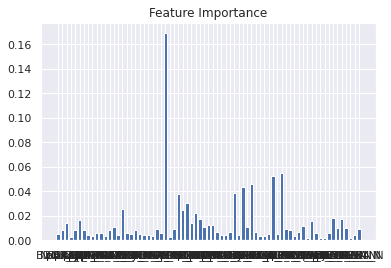

In [27]:
#https://stackoverflow.com/questions/48377296/get-feature-importance-from-gridsearchcv
feat_imp=gs.best_estimator_.feature_importances_ # extracting importance of each feature for the grid serach result which is best estimator 
fig = plt.figure()
plt.bar(gs.feature_names_in_,feat_imp)
plt.title('Feature Importance')

Observation:

1. Very good score was given by SVM with n-estimators=500 and 10 leaf nodes.
2. Score was the best among the 4 models.
3. Certain features were more important than the others.

# Multiclass Prediction

Let Label treatment behaviour

In [29]:
from sklearn import preprocessing 
enc = preprocessing.LabelEncoder() #Import the liabrary
train_df['Treatment_Behavior'] = enc.fit_transform(train_df['Treatment_Behavior']) #Label the discrete values
model2_out = train_df['Treatment_Behavior'] 
model2_out #Output in numarical form...

0      0
1      0
2      0
3      0
4      0
      ..
757    3
758    3
759    3
760    3
761    3
Name: Treatment_Behavior, Length: 762, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split # From sklearm.model we can choose train_test_split for this operation
model2_ip_train, model2_ip_test, model2_out_train, model2_out_test = train_test_split(input_df1_scaled, model2_out, test_size=0.2, random_state=42) # Test size is given as 0.2 then there may 20% test and 80% train datas.

**1.Logistic regression with elastic penality**

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Let us define Logistic regression in Logistic2 elastic net 
Logistic2 = LogisticRegression(C=0.6, penalty="elasticnet", solver="saga", l1_ratio=0.2,max_iter=1000)
#Form the model and for 1000 iterations and mean accuracy given by
score2 = cross_val_score(Logistic2, model2_ip_train, model2_out_train, scoring='accuracy', cv=fld, n_jobs=-1)
print('Treatment Behavior mean accuracy is :' + str(np.mean(score2)))

Treatment Behavior mean accuracy is :0.9786207830917221


In [32]:
#To calculate the prediction score  using test data
regression_model = LogisticRegression(C=1, penalty="elasticnet", solver="saga", l1_ratio=0.2,max_iter = 1000).fit(model2_ip_train, model2_out_train)
val_model3=regression_model #we will use this model later for test
output_2 = regression_model.predict(model2_ip_test)
print("Model accuracy score: ",regression_model.score(model2_ip_test, np.ravel(model2_out_test)))

Model accuracy score:  0.9869281045751634


Text(0.5, 1.0, 'Feature Importance')

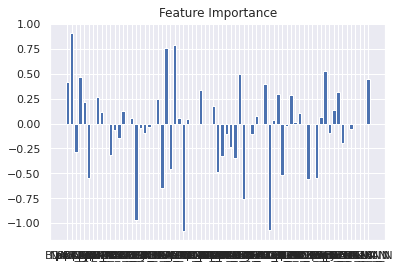

In [33]:
feat_imp=regression_model.coef_[0]
fig = plt.figure()
plt.bar(gs.feature_names_in_,feat_imp)
plt.title('Feature Importance')


 Mean Test scores for each feature eliminated are:
[0.59597615 0.64363907 0.68291559 0.76511313 0.81269476 0.84399133
 0.87019374 0.87675112 0.90638125 0.91129928 0.93926297 0.94418101
 0.94247392 0.95233708 0.95235063 0.95069774 0.95232353 0.95396288
 0.95726866 0.95892156 0.95398997 0.96713182 0.96549248 0.96385314
 0.96547893 0.96710473 0.97203631 0.97698144 0.97039697 0.97532855
 0.97204986 0.9736892  0.97532855 0.97696789 0.97367565 0.97863433
 0.97699499 0.9736892  0.97532855 0.97532855 0.97860723 0.97860723
 0.97860723 0.97695434 0.97695434 0.97367565 0.97367565 0.975315
 0.97862078 0.98026013 0.98189947 0.98026013 0.98026013 0.97862078
 0.97862078 0.98026013 0.98189947 0.98189947 0.98189947 0.98353882
 0.98026013 0.98026013 0.98026013 0.98026013 0.98189947 0.98189947
 0.98026013 0.98353882 0.98353882 0.98353882 0.98353882]

 Rankings of Each feature 
[ 1  1  1  1  1  1  1  1  1  2  1  1  1  8  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 12  1  1  1  1  1  1  1  1  1 

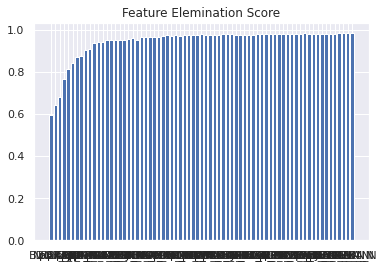

In [34]:
#reference: https://machinelearningmastery.com/rfe-feature-selection-in-python/
#reference:https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

estimator = regression_model    #we will use the best estimator achieved from gridsearch
selector = RFECV(estimator, step=1, cv=fld)   # define RFECV selector using best estimator
selector = selector.fit(model2_ip_train,model2_out_train) # fit the data into selector

#print mean (of all folds) score for every feature eliminated
print("\n Mean Test scores for each feature eliminated are:")
print(selector.cv_results_['mean_test_score'])


#plot the scores after eliminating each feature

fig = plt.figure()
plt.bar(gs.feature_names_in_,selector.cv_results_['mean_test_score'])
plt.title('Feature Elemination Score')

#ranking of each feature as per score it gives when eliminated
print("\n Rankings of Each feature ")
print(selector.ranking_)


#maximum accuracy achieved in the process
print("\n maximum accuracy achieved is:")
print(max(selector.cv_results_['mean_test_score']))

In [35]:
#Importing confusion Matrix
from sklearn.metrics import confusion_matrix

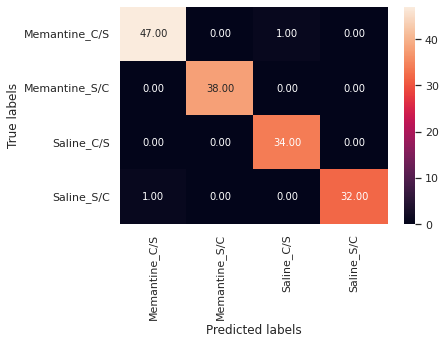

In [36]:
##Defining confusion matrix to plot actual and predicted values...
cm = confusion_matrix(model2_out_test,output_2)
#matrix will be oriented as [0,1,2,3] i.e class 0 in first row 1 in second row and so and so forth
#plotted in heatmap labels are given
sns.heatmap(cm,annot=True,fmt = '.2f',xticklabels=['Memantine_C/S','Memantine_S/C','Saline_C/S','Saline_S/C'],yticklabels=['Memantine_C/S','Memantine_S/C','Saline_C/S','Saline_S/C'])
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

**Summary from confusion matrix**

1.   Column represents predicted lables and row are actual labels.
2.   The diagonal shows the correclty classified labels on predicted and actual.

1.   Off diagonal are zero therefore no miss classification..






In [37]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(model2_out_test,output_2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        48
           1       1.00      1.00      1.00        38
           2       0.97      1.00      0.99        34
           3       1.00      0.97      0.98        33

    accuracy                           0.99       153
   macro avg       0.99      0.99      0.99       153
weighted avg       0.99      0.99      0.99       153



**2.Neural Network**

In [38]:
#Liabrary to check by model before using K for cross validation...
#ref https://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
# define the neueral network model 2
model_neural2 = MLPClassifier(hidden_layer_sizes=(100,),activation='relu', alpha=0.05)
#Single hidden size given as (100,) default in reference
#activation function is choosen as 'relu'
# define the 5-fold cross validation procedure
cv = KFold(n_splits=5,shuffle=False)
# evaluate the model and collect the scores
n_scores = cross_val_score(model_neural2, model2_ip_test, model2_out_test, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy of Treatment Behavior:' + str(np.mean(n_scores)))

Mean Accuracy of Treatment Behavior:0.9146236559139785


In [39]:
model_neural2 = MLPClassifier(hidden_layer_sizes=(50,20),activation='relu', alpha=0.05)
model_neural2.fit(model2_ip_train,model2_out_train)
output_2_NN = model_neural2.predict(model2_ip_test)
val_model4=model_neural2 #we will use this model later in test
print("Model accuracy score: ",model_neural2.score(model2_ip_test, np.ravel(model2_out_test)))

Model accuracy score:  0.9934640522875817


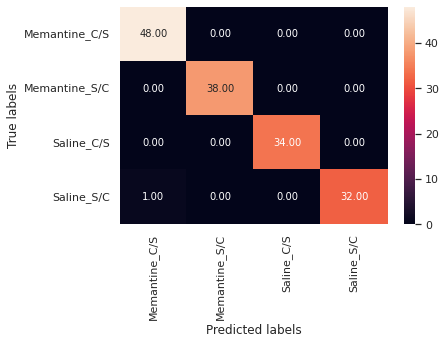

In [40]:
##Defining confusion matrix to plot actual and predicted values...
cm = confusion_matrix(model2_out_test,output_2_NN)
#matrix will be oriented as [0,1,2,3] i.e class 0 in first row 1 in second row and so and so forth
#plotted in heatmap labels are given
sns.heatmap(cm,annot=True,fmt = '.2f',xticklabels=['Memantine_C/S','Memantine_S/C','Saline_C/S','Saline_S/C'],yticklabels=['Memantine_C/S','Memantine_S/C','Saline_C/S','Saline_S/C'])
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

In [41]:
from sklearn.metrics import classification_report
print(classification_report(model2_out_test,output_2_NN))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        34
           3       1.00      0.97      0.98        33

    accuracy                           0.99       153
   macro avg       0.99      0.99      0.99       153
weighted avg       0.99      0.99      0.99       153



**3.SVM**

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
# define the SVM model
SVM2 = SVC(kernel='rbf', C=1.0, gamma='auto')
# define the 5-fold cross validation procedure
SVM_fold = KFold(n_splits=5,shuffle=False)
# evaluate the model and collect the scores
n_scores = cross_val_score(SVM2, model2_ip_train, model2_out_train, scoring='accuracy', cv=SVM_fold, n_jobs=-1)
print('Treatment Behavior mean accuracy is :' + str(np.mean(n_scores)))

Treatment Behavior mean accuracy is :0.990150386126541


In [43]:
#Related library
#REF https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification


X, Y = make_classification(
    n_samples=762,                                                               #No.of samples here 762
    n_features=70,                                                               #No.of features
    n_informative=30,                                                            #Informative features
    n_redundant=0,
    n_repeated=0,
    n_classes=4,
    n_clusters_per_class=4,
    random_state=0,
)
# Create the RFE object and compute a cross-validated score.
modelSV = SVC(kernel='linear', C=1.0, gamma='auto')
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 10  # Minimum number of features to consider
SVM_Model = RFECV(
    estimator=modelSV,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
SVM_Model.fit(model2_ip_train, model2_out_train,)

print("Optimal number of features wrt Treatment behaviour : %d" % SVM_Model.n_features_)
SVM_Model.get_feature_names_out()

Optimal number of features wrt Treatment behaviour : 60


array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x41', 'x42',
       'x43', 'x44', 'x45', 'x46', 'x47', 'x49', 'x50', 'x51', 'x52',
       'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x63',
       'x64', 'x67', 'x68', 'x70'], dtype=object)


 Mean Test scores for each feature eliminated are:
[0.58777943 0.62234115 0.73727137 0.77825498 0.81281669 0.85714673
 0.87683241 0.89157296 0.91299282 0.92280179 0.93595719 0.95239127
 0.94908549 0.95240482 0.95566996 0.96224089 0.96224089 0.96715892
 0.9720905  0.97867498 0.97700854 0.97535564 0.98031432 0.97538274
 0.97866143 0.98195366 0.98359301 0.98194012 0.98194012 0.98030077
 0.97864788 0.97866143 0.98521881 0.98030077 0.98030077 0.98194012
 0.98194012 0.97866143 0.98357946 0.98028722 0.97535564 0.97699499
 0.98192657 0.98356591 0.98028722 0.98194012 0.97866143 0.98194012
 0.98030077 0.98194012 0.98194012 0.98357946 0.98194012 0.98030077
 0.98030077 0.98030077 0.98030077 0.98194012 0.98194012 0.98194012
 0.98030077 0.98030077 0.98357946 0.98357946 0.98521881 0.98357946
 0.98521881 0.98685815 0.98685815 0.98685815 0.98685815]

 Rankings of Each feature 
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

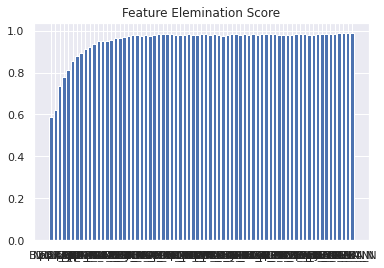

In [44]:
#reference: https://machinelearningmastery.com/rfe-feature-selection-in-python/
#reference:https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

estimator = modelSV    #we will use the best estimator achieved from gridsearch
selector = RFECV(estimator, step=1, cv=fld)   # define RFECV selector using best estimator
selector = selector.fit(model2_ip_train,model2_out_train) # fit the data into selector

#print mean (of all folds) score for every feature eliminated
print("\n Mean Test scores for each feature eliminated are:")
print(selector.cv_results_['mean_test_score'])


#plot the scores after eliminating each feature

fig = plt.figure()
plt.bar(gs.feature_names_in_,selector.cv_results_['mean_test_score'])
plt.title('Feature Elemination Score')

#ranking of each feature as per score it gives when eliminated
print("\n Rankings of Each feature ")
print(selector.ranking_)


#maximum accuracy achieved in the process
print("\n maximum accuracy achieved is:")
print(max(selector.cv_results_['mean_test_score']))

**4.Random forest**

In [45]:
#Building Random forrest model
from sklearn.ensemble import RandomForestClassifier
##Initializing with max_depth and n_estimators
randm_clf2 = RandomForestClassifier(max_depth=10, n_estimators=1000,max_leaf_nodes=10) #n_estimator number of trees in the forest max_depth=depthbof tree
randm_clf2.fit(model2_ip_train,model2_out_train)

RandomForestClassifier(max_depth=10, max_leaf_nodes=10, n_estimators=1000)

Text(0.5, 1.0, 'Feature Importance')

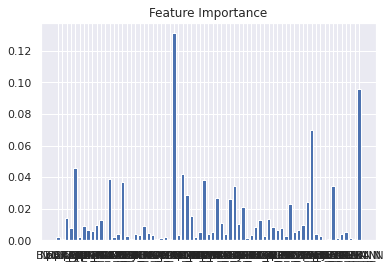

In [46]:
feat_imp=randm_clf2.feature_importances_ # extracting importance of each feature for the grid serach result which is best estimator 
fig = plt.figure()
plt.bar(gs.feature_names_in_,feat_imp)
plt.title('Feature Importance')

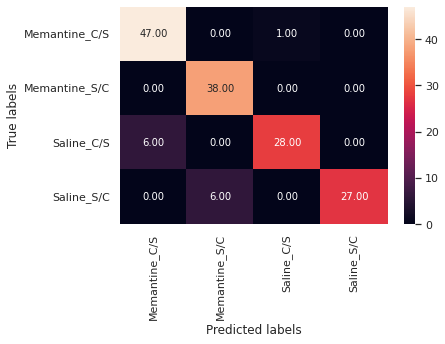

In [47]:
output_2_rf = randm_clf2.predict(model2_ip_test)
##Defining confusion matrix to plot actual and predicted values...
cm = confusion_matrix(model2_out_test,output_2_rf)
#matrix will be oriented as [0,1,2,3] i.e class 0 in first row 1 in second row and so and so forth
#plotted in heatmap labels are given
sns.heatmap(cm,annot=True,fmt = '.2f',xticklabels=['Memantine_C/S','Memantine_S/C','Saline_C/S','Saline_S/C'],yticklabels=['Memantine_C/S','Memantine_S/C','Saline_C/S','Saline_S/C'])
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

**Observation from confusion Matrix**

1.   For prediction and test labels the diagonal elements are the shows the correct classification
2.   Off diagonal has few numbers so the model perfectly fits and classification is perfect



In [48]:
#Classification report...
#Give the f1 score and related parametrs..
print(classification_report(model2_out_test,output_2_rf))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        48
           1       0.86      1.00      0.93        38
           2       0.97      0.82      0.89        34
           3       1.00      0.82      0.90        33

    accuracy                           0.92       153
   macro avg       0.93      0.91      0.91       153
weighted avg       0.92      0.92      0.91       153




 Mean Test scores for each feature eliminated are:
[0.60751931 0.71425281 0.75691641 0.78483945 0.81440184 0.83078174
 0.85706544 0.85545319 0.87837691 0.88492074 0.88007045 0.86367701
 0.86202412 0.85711963 0.87524726 0.87524726 0.86862214 0.87522016
 0.87023439 0.8801111  0.88669557 0.88996071 0.89817098 0.90144967
 0.89490584 0.89653164 0.89322585 0.89814388 0.89650454 0.89814388
 0.90307546 0.90470126 0.90964639 0.9063677  0.9079664  0.90312966
 0.90144967 0.90308901 0.90471481 0.91127219 0.90800705 0.91293863
 0.91131283 0.91459152 0.91129928 0.919496   0.91787021 0.91125864
 0.90965994 0.91127219 0.90800705 0.90963284 0.90964639 0.91291153
 0.91619022 0.91456442 0.90142257 0.9063406  0.90143612 0.91624441
 0.9063677  0.91127219 0.91457797 0.91128573 0.90967349 0.91129928
 0.90470126 0.91292508 0.91459152 0.90140902 0.90800705]

 Rankings of Each feature 
[12 23  1  1  1  9  1  1  1  1  1 24  1  5  1  1 11 15  1  8  1  1  7 22
 20 14 25  1  1  1  1  1 13  1  1  1  1  1  1  1  1  

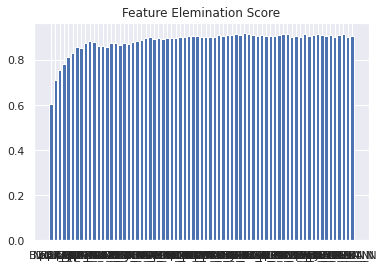

In [49]:
#reference: https://machinelearningmastery.com/rfe-feature-selection-in-python/
#reference:https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

estimator = randm_clf2    #we will use the best estimator achieved from gridsearch
selector = RFECV(estimator, step=1, cv=fld)   # define RFECV selector using best estimator
selector = selector.fit(model2_ip_train,model2_out_train) # fit the data into selector

#print mean (of all folds) score for every feature eliminated
print("\n Mean Test scores for each feature eliminated are:")
print(selector.cv_results_['mean_test_score'])


#plot the scores after eliminating each feature

fig = plt.figure()
plt.bar(gs.feature_names_in_,selector.cv_results_['mean_test_score'])
plt.title('Feature Elemination Score')

#ranking of each feature as per score it gives when eliminated
print("\n Rankings of Each feature ")
print(selector.ranking_)


#maximum accuracy achieved in the process
print("\n maximum accuracy achieved is:")
print(max(selector.cv_results_['mean_test_score']))

TESTING DATA PREDICTIONS

1.BINARY CLASSIFICATION

In [53]:
pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv")

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,NaN,1.649983,Control,Memantine_C/S
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,NaN,1.638988,Control,Memantine_C/S
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,NaN,1.564925,Control,Memantine_C/S
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,NaN,1.682222,Control,Memantine_C/S
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,NaN,1.660352,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.226900,0.395432,0.248694,1.460666,1.860128,0.188536,0.148977,2.178982,0.165398,0.770115,...,0.157209,0.122747,0.134559,0.400268,0.228568,0.233317,0.283853,1.160740,Ts65Dn,Saline_S/C
221,0.261107,0.443780,0.276658,1.674129,2.256494,0.218216,0.176008,2.475735,0.184040,0.913363,...,0.151454,0.119881,0.131988,0.407596,0.228843,0.226944,0.249970,1.139347,Ts65Dn,Saline_S/C
222,0.216134,0.364058,0.241693,1.330831,1.737540,0.197125,0.151597,1.919489,0.162780,0.720767,...,0.171437,0.118758,0.146772,0.431334,0.255633,0.257004,0.304811,1.142205,Ts65Dn,Saline_S/C
223,0.212369,0.369960,0.239036,1.346827,1.814940,0.194538,0.143454,1.908112,0.155823,0.772530,...,0.177576,0.121366,0.152825,0.395408,0.245564,0.255852,0.308484,1.112718,Ts65Dn,Saline_S/C


In [54]:
train_df = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv")
train_df.info()
train_df.Genotype.value_counts() #Value count...
train_df.Treatment_Behavior.value_counts()
#Unique values count
for clms in train_df.columns.values: #Ittertared through columns
  print(clms+" has "+str(len(pd.unique(train_df[clms])))+" unique values ") #Generates string length for unique values in each columns
  print("\n")
from sklearn.experimental import enable_iterative_imputer #Related library
from sklearn.impute import IterativeImputer
data_test_ip = train_df.loc[:,'DYRK1A_N':'CaNA_N']
data_test_ip #Select input data
#ref [5]

# imp = IterativeImputer(max_iter=20, random_state=0)
# imp.fit(data_test_ip)
# IterativeImputer(random_state=0)
# imp.transform(data_test_ip)

#ref [9]
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state=42)
test_data_ip = imputer.fit_transform(data_test_ip)
test_data_ip = pd.DataFrame(test_data_ip, columns=data_test_ip.columns)
test_data_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DYRK1A_N            225 non-null    float64
 1   ITSN1_N             225 non-null    float64
 2   BDNF_N              225 non-null    float64
 3   NR1_N               225 non-null    float64
 4   NR2A_N              225 non-null    float64
 5   pAKT_N              225 non-null    float64
 6   pBRAF_N             225 non-null    float64
 7   pCAMKII_N           225 non-null    float64
 8   pCREB_N             225 non-null    float64
 9   pELK_N              225 non-null    float64
 10  pERK_N              225 non-null    float64
 11  pJNK_N              225 non-null    float64
 12  PKCA_N              225 non-null    float64
 13  pMEK_N              225 non-null    float64
 14  pNR1_N              225 non-null    float64
 15  pNR2A_N             225 non-null    float64
 16  pNR2B_N 

In [55]:
from sklearn import preprocessing 
enc = preprocessing.LabelEncoder() #Import the liabrary
train_df['Genotype'] = enc.fit_transform(train_df['Genotype']) #Label the discrete values
val_model1_target = train_df['Genotype'] 
val_model1_target #Output in numarical form...

0      0
1      0
2      0
3      0
4      0
      ..
220    1
221    1
222    1
223    1
224    1
Name: Genotype, Length: 225, dtype: int64

In [56]:
from sklearn import preprocessing 
enc = preprocessing.LabelEncoder() #Import the liabrary
train_df['Treatment_Behavior'] = enc.fit_transform(train_df['Treatment_Behavior']) #Label the discrete values
val_model2_target = train_df['Treatment_Behavior'] 
val_model2_target #Output in numarical form...

0      0
1      0
2      0
3      0
4      0
      ..
220    3
221    3
222    3
223    3
224    3
Name: Treatment_Behavior, Length: 225, dtype: int64

In [57]:
val_data_ip_raw=test_data_ip
val_data_ip_raw



,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.211462,0.127400,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,0.121739,1.649983
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.222265,0.134822,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,0.116850,1.638988
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.227446,0.124327,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,0.108506,1.564925
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.207185,0.145496,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,0.144687,1.682222
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.213444,0.148315,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,0.140219,1.660352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.226900,0.395432,0.248694,1.460666,1.860128,0.188536,0.148977,2.178982,0.165398,0.770115,...,0.278251,0.208354,0.157209,0.122747,0.134559,0.400268,0.228568,0.233317,0.283853,1.160740
221,0.261107,0.443780,0.276658,1.674129,2.256494,0.218216,0.176008,2.475735,0.184040,0.913363,...,0.273234,0.192760,0.151454,0.119881,0.131988,0.407596,0.228843,0.226944,0.249970,1.139347
222,0.216134,0.364058,0.241693,1.330831,1.737540,0.197125,0.151597,1.919489,0.162780,0.720767,...,0.289738,0.218179,0.171437,0.118758,0.146772,0.431334,0.255633,0.257004,0.304811,1.142205
223,0.212369,0.369960,0.239036,1.346827,1.814940,0.194538,0.143454,1.908112,0.155823,0.772530,...,0.279559,0.209781,0.177576,0.121366,0.152825,0.395408,0.245564,0.255852,0.308484,1.112718


In [58]:
remove_cols

array([ 0,  1,  3, 10, 14, 53])

Model1: we will use SVM since it gave good results with gamma=0.01 and degree=2

In [59]:
val_data_ip = val_data_ip_raw.drop(val_data_ip_raw.columns[remove_cols], axis=1) # removing the columns
val_data_ip


,BDNF_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pJNK_N,PKCA_N,pMEK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.446958,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,0.348667,0.348291,0.245963,...,0.211462,0.127400,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,0.121739,1.649983
1,0.464964,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,0.353874,0.362704,0.260634,...,0.222265,0.134822,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,0.116850,1.638988
2,0.470056,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,0.361690,0.368386,0.259549,...,0.227446,0.124327,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,0.108506,1.564925
3,0.393465,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,0.337290,0.335699,0.250643,...,0.207185,0.145496,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,0.144687,1.682222
4,0.411203,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,0.348531,0.354685,0.270284,...,0.213444,0.148315,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,0.140219,1.660352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.248694,1.860128,0.188536,0.148977,2.178982,0.165398,0.770115,0.234513,0.222421,0.218092,...,0.278251,0.208354,0.157209,0.122747,0.134559,0.400268,0.228568,0.233317,0.283853,1.160740
221,0.276658,2.256494,0.218216,0.176008,2.475735,0.184040,0.913363,0.264183,0.259228,0.257006,...,0.273234,0.192760,0.151454,0.119881,0.131988,0.407596,0.228843,0.226944,0.249970,1.139347
222,0.241693,1.737540,0.197125,0.151597,1.919489,0.162780,0.720767,0.223802,0.236581,0.221725,...,0.289738,0.218179,0.171437,0.118758,0.146772,0.431334,0.255633,0.257004,0.304811,1.142205
223,0.239036,1.814940,0.194538,0.143454,1.908112,0.155823,0.772530,0.222490,0.215904,0.215422,...,0.279559,0.209781,0.177576,0.121366,0.152825,0.395408,0.245564,0.255852,0.308484,1.112718


In [60]:
model1_pred1=val_model1.predict(val_data_ip)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(val_model1_target,model1_pred1))
print(classification_report(val_model1_target,model1_pred1))

[[113  22]
 [ 27  63]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       135
           1       0.74      0.70      0.72        90

    accuracy                           0.78       225
   macro avg       0.77      0.77      0.77       225
weighted avg       0.78      0.78      0.78       225



**Observations**

1.   Given model gives resonable F1 score for predicted and exact values
2.   Shows accuracy around 0.77.



Model2: we will use RANDMO FOREST MODEL.

In [62]:
model2_pred=val_model2.predict(val_data_ip)
print(confusion_matrix(val_model1_target,model2_pred))
print(classification_report(val_model1_target,model2_pred))

[[105  30]
 [ 39  51]]
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       135
           1       0.63      0.57      0.60        90

    accuracy                           0.69       225
   macro avg       0.68      0.67      0.67       225
weighted avg       0.69      0.69      0.69       225



**Obeservations**


1.   List item
2.   List item



2.Multi Class Classification

2.1.We will use Loogistic Regression Model with ElasticNet Penalty

In [67]:
model3_pred = regression_model.predict(val_data_ip) #Prediction by our model "regression_model" is the model name
print(confusion_matrix(val_model2_target,model3_pred)) #Confusion matrix generation
print(classification_report(val_model2_target,model3_pred)) #Model summary

[[60  0  0  0]
 [ 0 60  0  0]
 [60  0  0  0]
 [15 30  0  0]]
              precision    recall  f1-score   support

           0       0.44      1.00      0.62        60
           1       0.67      1.00      0.80        60
           2       0.00      0.00      0.00        60
           3       0.00      0.00      0.00        45

    accuracy                           0.53       225
   macro avg       0.28      0.50      0.35       225
weighted avg       0.30      0.53      0.38       225



**Observation**


> There is lots of miss classification for label 2 and 3 for label 0 and 1 gives reasonable f1 score



2.2.We will use neural network model

In [68]:
output_2_NN = model_neural2.predict(val_data_ip) #Predict the output using NN model

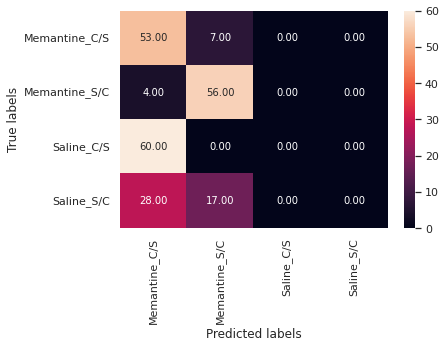

In [71]:
##Defining confusion matrix to plot actual and predicted values...
cm = confusion_matrix(val_model2_target,output_2_NN)
#matrix will be oriented as [0,1,2,3] i.e class 0 in first row 1 in second row and so and so forth
#plotted in heatmap labels are given
sns.heatmap(cm,annot=True,fmt = '.2f',xticklabels=['Memantine_C/S','Memantine_S/C','Saline_C/S','Saline_S/C'],yticklabels=['Memantine_C/S','Memantine_S/C','Saline_C/S','Saline_S/C'])
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

In [72]:
model4_pred=val_model4.predict(val_data_ip)
#print(confusion_matrix(val_model2_target,model4_pred))
print(classification_report(val_model2_target,model4_pred))

              precision    recall  f1-score   support

           0       0.37      0.88      0.52        60
           1       0.70      0.93      0.80        60
           2       0.00      0.00      0.00        60
           3       0.00      0.00      0.00        45

    accuracy                           0.48       225
   macro avg       0.27      0.45      0.33       225
weighted avg       0.28      0.48      0.35       225



**Observation**


> This model is also not perfect for labels 'Saline_C/S','Saline_S/C'


REFERENCES:

[1]https://www.geeksforgeeks.org/count-the-number-of-rows-and-columns-of-a-pandas-dataframe/
[2]https://thispointer.com/pandas-loop-or-iterate-over-all-or-certain-columns-of-a-dataframe/
[3]https://medium.com/@sebastiannorena/finding-correlation-between-many-variables-multidimensional-dataset-with-python-5deb3f39ffb3
[4]https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.html
[5]https://scikit-learn.org/stable/modules/impute.html
[6]https://www.youtube.com/watch?v=HBi-P5j0Kec
[7]https://stackoverflow.com/questions/40399315/flatten-tuple-containing-numpy-array-to-numpy-array
[8]https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe
[9]https://towardsdatascience.com/iterative-imputation-with-scikit-learn-8f3eb22b1a38
[10]https://stackoverflow.com/questions/40142686/converting-non-numeric-to-numeric-value-using-panda-libraries
[11]https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
[12]https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
[13]https://stackoverflow.com/questions/48377296/get-feature-importance-from-gridsearchcv

Multiclass prediction...

1.Label encoder: 
	https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

2.Logistic regression with elastic penality


> 	a.Machine learning using Python by Manaranjan Pradhan and U Dinesh Kumar Chapter 5&6 Page No: from 158 to 210...
	b.https://machinelearningmastery.com/elastic-net-regression-in-python/
	c.https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html


3. Neural Network
>	a.https://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron
	
4. SVM
>	a.https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
	
5.Random forest
> a. Machine learning using Python by Manaranjan Pradhan and U Dinesh  Kumar Chapter 5&6 Page No: from 226 to 243
For ROC and AUC
	Machine learning using Python by Manaranjan Pradhan and U Dinesh Kumar Chapter 5&6 Page No: 229


Other Students With Whom I Dsicussed:

Paavan Harish Gouniyal : 213070051
Anal Prakash Sharma : 213079011
Surbhika Rastogi : 213070056
Rohan Appaso More :213230013

